<strong><h1>UNIVERSIDAD NACIONAL DE COLOMBIA

<h2>FACULTAD DE INGENIERÍA<h2>

<h2>DEPARTAMENTO DE INGENIERÍA DE SISTEMAS E INDUSTRIAL<h2>

<h2>Taller de Herraminetas y Problemas en Ingeniería Industrial</h2>

<strong><h2>Taller 1. Introducción al Análisis Exploratorio de Datos</h2></strong>

<h3>Hernán Castaño Martínez</h3>

<h3>Santiago Irreño Mejía</h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


### El contenido de este notebook de python corresponde al desarrollo del segundo punto del Taller I

### Descargue del sitio web los archivos correspondientes a los resultados de las pruebas 2019-2 para las competencias genéricas y específicas en formato csv para Excel. Lea los archivos y conviértalos en Data Frames de Pandas.

In [7]:
!ls

drive  sample_data


In [10]:
import os
os.chdir("/content/drive/My Drive/google.colab")

In [11]:
!ls

'ANÁLISIS EXPLORATORIO DE DATOS.ipynb'	'SABER_PRO_ESPECIFICAS_2019-2 (2).xlsx'
'ANÁLISIS FLOR IRIS.ipynb'		 SABER_PRO_GENERICAS_2019-2.xlsx
'ANÁLISIS SIVICAP-POBLACION.ipynb'	 SIVICAP_2016V2.gsheet
 Poblacion2018V2.gsheet			 SIVICAP_2016V2.xlsx
 Poblacion2018V2.xlsx


Se leen los archivos del Drive y se les asigna un nombre.

In [12]:
datos_esp=pd.read_excel("SABER_PRO_ESPECIFICAS_2019-2 (2).xlsx",index=True)
datos_esp.shape

(401815, 5)

In [13]:
datos_esp.head(10)

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO
0,EK201950087285,1002,DISEÑO DE SISTEMAS MECÁNICOS,127,1
1,EK201950087285,5002,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,178,3
2,EK201950087285,8003,PENSAMIENTO CIENTÍFICO - CIENCIAS FÍSICAS,174,3
3,EK201950087452,8002,GESTIÓN DE ORGANIZACIONES,112,1
4,EK201950087452,1003,GESTIÓN FINANCIERA,109,1
5,EK201950087609,1003,GESTIÓN FINANCIERA,147,2
6,EK201950088495,2611,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,136,2
7,EK201950088495,5002,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,151,2
8,EK201950088495,9003,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍS...,103,1
9,EK201950089455,4003,INVESTIGACIÓN EN CIENCIAS SOCIALES,118,1


In [14]:
type(datos_esp)

pandas.core.frame.DataFrame

In [15]:
datos_gen=pd.read_excel("SABER_PRO_GENERICAS_2019-2.xlsx",index=True)
datos_gen.shape

(260756, 105)

In [16]:
datos_gen.head(10)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DISC_FISICA,ESTU_DISC_SISTEM,ESTU_DISC_AUDITCASTELL,ESTU_DISC_AUDITLSC,ESTU_DISC_VISUALCEGUE,ESTU_DISC_VISUALBAJA,ESTU_DISC_VOZHABLA,ESTU_DISC_INTELEC,ESTU_DISC_SORDOCEGUERA,ESTU_DISC_PSICOSOCIAL,ESTU_DISC_ASPERGER,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_AREARESIDE,ESTU_COLE_TERMINO,ESTU_OTROCOLE_TERMINO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_COMOCAPACITOEXAMENSB11,ESTU_CURSODOCENTESIES,ESTU_CURSOIESAPOYOEXTERNO,ESTU_CURSOIESEXTERNA,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,...,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITAT_DESEM,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_DESEM,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PNBC,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_DESEM,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PNBC,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PNBC,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,CC,COLOMBIA,F,1996-08-06 00:00:00,NO,20195,EK201950332829,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALLE,76.0,CALI,76001.0,Cabecera Municipal,24611.0,NaN,1.760010e+11,76001.0,Entre 2.5 millones y menos de 4 millones,No,No,No,Si,Tomó un curso de preparación,Entre 20 y 30 horas,Entre 20 y 30 horas,Entre 20 y 30 horas,Si,Si,...,UNIVERSITARIO,PRESENCIAL,ADMINISTRACIÓN,76001,CALI,VALLE,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,76001,CALI,VALLE,76,105,1,11.0,12.0,111,1,12.0,17.0,100,1,12.0,14.0,111.0,NaN,9.0,10.0,106.0,1.0,6.0,6.0,107,4.0,4.0,4.492671e+14,1.0,3,PUBLICAR
1,CC,COLOMBIA,F,1999-01-02 00:00:00,NO,20195,EK201950328090,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALLE,76.0,CALI,76001.0,Cabecera Municipal,19823.0,NaN,1.760010e+11,76001.0,Entre 2.5 millones y menos de 4 millones,No,Si,No,Si,Repasó por cuenta propia,NaN,NaN,NaN,NaN,NaN,...,UNIVERSITARIO,PRESENCIAL,ADMINISTRACIÓN,76001,CALI,VALLE,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,76001,CALI,VALLE,76,130,2,33.0,38.0,137,2,37.0,48.0,171,3,80.0,88.0,140.0,A1,38.0,46.0,143.0,2.0,50.0,53.0,144,59.0,48.0,6.670235e+14,4.0,3,PUBLICAR
2,CC,COLOMBIA,F,12/13/1984 12:00:00 AM,NO,20195,EK201950332409,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALLE,76.0,CALI,76001.0,Cabecera Municipal,0.0,NaN,NaN,NaN,Entre 2.5 millones y menos de 4 millones,No,No,No,Si,Repasó por cuenta propia,NaN,NaN,NaN,NaN,NaN,...,UNIVERSITARIO,PRESENCIAL,ADMINISTRACIÓN,76001,CALI,VALLE,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,76001,CALI,VALLE,76,135,2,37.0,44.0,141,2,41.0,53.0,135,2,42.0,50.0,143.0,A1,42.0,50.0,175.0,3.0,84.0,87.0,146,62.0,51.0,5.758575e+14,3.0,3,PUBLICAR
3,CC,COLOMBIA,F,1990-09-08 00:00:00,NO,20195,EK201950332743,ESTUDIANTE,COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VALLE,76.0,CANDELARIA,76130.0,Area Rural,3642.0,NaN,2.761300e+11,76130.0,Entre 2.5 millones y menos de 4 millones,No,Si,Si,Si,Tomó un curso de preparación,Menos de 20 horas,Menos de 20 horas,Menos de 20 horas,Si,Si,...,UNIVERSITARIO,PRESENCIAL,ADMINISTRACIÓN,76001,CALI,VALLE,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,N,76001,CALI,VALLE,76,120,1,22.0,26.0,110,1,12.0,15.0,154,2,62.0,72.0,122.0,NaN,16.0,19.0,145.0,2.0,55.0,

### **Construya a partir de los dos Data Frames anteriores un Data Frame que contenga los siguientes campos: identificador de estudiante, nombre de la universidad, municipio, resultados de cada prueba específica y genérica. Debe hacerlo para las dos universidades que le son indicadas a la pareja y para el programa de ingeniería industrial.**

## **UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA**



Se crea una serie que lea el archivo de las competencias genéricas y busca en la columna de programa académico que cumpla la condición de ser Ingeniería Industrial, además de ser de estudiante de la universidad proporcionada, en este caso la Pontificia Bolivariana de Bucaramanga. Para así reducir la información a los datos que nos interesan.

In [17]:
serie2=datos_gen[(datos_gen.ESTU_PRGM_ACADEMICO=='INGENIERIA INDUSTRIAL')&\
      (datos_gen['INST_NOMBRE_INSTITUCION'].str.contains('UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA'))]\
      ['ESTU_CONSECUTIVO']

In [18]:
serie2.shape

(154,)

En este instante se crea un nuevo DataFrame que examina las competencias específicas que cumplan con las condiciones de la Serie que creamos anteriormente. Apartir del Consecutivo del Estudiante

In [19]:
nuevoodf=datos_esp.loc[datos_esp['ESTU_CONSECUTIVO'].isin(serie2)]
nuevoodf.shape

(462, 5)

In [20]:
nuevoodf.head()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO
22709,EK201950255917,2611,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,144,2
22710,EK201950255917,5002,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,180,3
22711,EK201950255917,9003,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍS...,171,3
23661,EK201950255606,2611,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,170,3
23662,EK201950255606,5002,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,183,3


En esta línea pretendemos que cada estudiante que haya presentado 2 ó 3 pruebas específicas, ahora sea una sola fila en vez de 2 ó 3 respectivamente; para así tener una mejor visual de la información. Seleccionando un elemento pivot que esté presente para contrastar.

In [21]:
dframe=nuevoodf.pivot_table('RESULT_PUNTAJE', ['ESTU_CONSECUTIVO'], 'RESULT_NOMBREPRUEBA')
dframe.shape

(154, 3)

In [22]:
dframe.head()

RESULT_NOMBREPRUEBA,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA
ESTU_CONSECUTIVO,,,
EK201950255586,144,151,160
EK201950255589,114,132,95
EK201950255596,198,190,143
EK201950255600,192,200,188
EK201950255602,138,123,102


Seleccionamos las columnas del archivo de competencias genéricas que nos interesan para después conectar este DataFrame con el anterior.

In [23]:
dframe2=datos_gen[(datos_gen.ESTU_PRGM_ACADEMICO=='INGENIERIA INDUSTRIAL')\
                  &(datos_gen['INST_NOMBRE_INSTITUCION'].str.contains('UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA'))]\
                  [['ESTU_CONSECUTIVO','INST_NOMBRE_INSTITUCION','ESTU_PRGM_ACADEMICO','ESTU_MCPIO_RESIDE','MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT','PUNT_GLOBAL']]

In [24]:
dframe2.head()

,ESTU_CONSECUTIVO,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_MCPIO_RESIDE,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
109127,EK201950255982,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,BUCARAMANGA,190,150,176,173.0,142.0,166
109128,EK201950255988,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,FLORIDABLANCA,159,153,66,154.0,137.0,134
109129,EK201950255870,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,FLORIDABLANCA,176,164,171,184.0,108.0,161
109130,EK201950255838,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,FLORIDABLANCA,140,170,177,175.0,139.0,160
109131,EK201950255915,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,FLORIDABLANCA,207,187,183,215.0,144.0,187


Por medio de la función pd.merge podemos leer ambos DataFrames y unirlos con un elemento que llamaremos de nuevo pivot, el cual es el estudiante consecutivo.

In [25]:
dfinalBucaramanga=pd.merge(dframe, dframe2, on ='ESTU_CONSECUTIVO', how='outer')
dfinalBucaramanga.shape

(154, 13)

De esta manera ya tenemos todos los datos solicitados en una sola Tabla de datos filtrados en líneas de código anteriores.

In [26]:
dfinalBucaramanga.head()

,ESTU_CONSECUTIVO,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_MCPIO_RESIDE,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
0,EK201950255586,144,151,160,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,BUCARAMANGA,174,148,170,159.0,184.0,167
1,EK201950255589,114,132,95,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,BUCARAMANGA,155,144,147,169.0,115.0,146
2,EK201950255596,198,190,143,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,FLORIDABLANCA,196,182,195,200.0,198.0,194
3,EK201950255600,192,200,188,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,BUCARAMANGA,225,204,185,210.0,135.0,192
4,EK201950255602,138,123,102,UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA,INGENIERIA INDUSTRIAL,FLORIDABLANCA,119,144,130,152.0,90.0,127


## **CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA**


In [27]:
serie3=datos_gen[(datos_gen.ESTU_PRGM_ACADEMICO=='INGENIERIA INDUSTRIAL')&\
      (datos_gen['INST_NOMBRE_INSTITUCION'].str.contains('CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA'))]\
      ['ESTU_CONSECUTIVO']

Procedemos a hacer el mismo procedimiento para otra Universidad. No se junta toda la información en un solo DataFrame por facilidad al momento de manejar la información y por estética visual.

In [28]:
serie3.shape

(204,)

In [29]:
nuevooodf=datos_esp.loc[datos_esp['ESTU_CONSECUTIVO'].isin(serie3)]
nuevooodf.shape

(612, 5)

In [30]:
nuevooodf.head()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO
237000,EK201950202084,2611,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,105,1
237001,EK201950202084,5002,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,151,2
237002,EK201950202084,9003,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍS...,129,2
237003,EK201950204278,2611,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,151,2
237004,EK201950204278,5002,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,140,2


In [31]:
dframecuc=nuevooodf.pivot_table('RESULT_PUNTAJE', ['ESTU_CONSECUTIVO'], 'RESULT_NOMBREPRUEBA')
dframecuc.shape

(204, 3)

In [32]:
dframecuc.head()

RESULT_NOMBREPRUEBA,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA
ESTU_CONSECUTIVO,,,
EK201950186482,126,159,127
EK201950186688,138,153,108
EK201950194235,164,148,122
EK201950194350,167,152,122
EK201950194546,151,149,149


In [33]:
dframe2cuc=datos_gen[(datos_gen.ESTU_PRGM_ACADEMICO=='INGENIERIA INDUSTRIAL')\
                  &(datos_gen['INST_NOMBRE_INSTITUCION'].str.contains('CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA'))]\
                  [['ESTU_CONSECUTIVO','INST_NOMBRE_INSTITUCION','ESTU_PRGM_ACADEMICO','ESTU_MCPIO_RESIDE','MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT','MOD_COMPETEN_CIUDADA_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT','PUNT_GLOBAL']]

In [34]:
dframe2cuc.head()

,ESTU_CONSECUTIVO,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_MCPIO_RESIDE,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
20465,EK201950350409,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,SOLEDAD,144,114,92,97.0,139.0,117
20466,EK201950212395,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,BARRANQUILLA,169,94,114,155.0,153.0,137
20467,EK201950197480,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,BARRANQUILLA,140,174,175,195.0,175.0,172
20468,EK201950204921,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,SOLEDAD,112,145,146,167.0,164.0,147
20469,EK201950195529,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,GALAPA,126,158,96,134.0,139.0,131


In [35]:
dfinalcuc=pd.merge(dframecuc, dframe2cuc, on ='ESTU_CONSECUTIVO', how='outer')
dfinalcuc.shape

(204, 13)

Finalmente tenemos la totalidad de los datos bien organizados y listos para ser manipulados, separados por su respectiva Universidad y programa curricular.

In [36]:
dfinalcuc.head()

,ESTU_CONSECUTIVO,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_MCPIO_RESIDE,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
0,EK201950186482,126,159,127,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,PALMAR DE VARELA,123,184,144,162.0,101.0,143
1,EK201950186688,138,153,108,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,SOLEDAD,153,158,202,178.0,127.0,164
2,EK201950194235,164,148,122,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,GALAPA,158,99,96,142.0,130.0,125
3,EK201950194350,167,152,122,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,BARRANQUILLA,185,173,151,141.0,180.0,166
4,EK201950194546,151,149,149,"CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRA...",INGENIERIA INDUSTRIAL,BARRANQUILLA,188,178,169,180.0,195.0,182


**A partir de la tabla anterior realice el histograma de frecuencias (presente también la tabla de frecuencias) y el diagrama de cajas para los estudiantes del programa de ingeniería industrial para cada una de las dos universidades y para cada una de las competencias (genéricas y especificas) ¿Qué conclusiones puede obtenerse de estos gráficos?**

In [37]:
dfinalBucaramanga.columns

Index(['ESTU_CONSECUTIVO', 'DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS',
       'FORMULACIÓN DE PROYECTOS DE INGENIERÍA',
       'PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA',
       'INST_NOMBRE_INSTITUCION', 'ESTU_PRGM_ACADEMICO', 'ESTU_MCPIO_RESIDE',
       'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_LECTURA_CRITICA_PUNT',
       'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_INGLES_PUNT',
       'MOD_COMUNI_ESCRITA_PUNT', 'PUNT_GLOBAL'],
      dtype='object')

## **HISTOGRAMA, TABLAS DE FRECUENCIA Y DIAGRAMA DE CAJAS**

## ESPECIFICAS PONTIFICIA BOLIVARIANA-BUCARAMANGA

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA ESPECÍFICA: DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS

*Se le asigna a la variable "da" todos los datos que correspondan a la prueba específica de Diseño de sistemas productivos y logísticos y que cumplan con la condición de ser mayores que 0 ó que no estén vacios.

Seguidamente, los elementos de "da" son asignados a la variable "bucesp1", la que significa "Bucaramanga específicas 1".*

In [169]:
da=dfinalBucaramanga[dfinalBucaramanga['DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS']>0]
bucesp1=da.iloc[0:155][['DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS']] 
bucesp1.head()

,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS
0,144
1,114
2,198
3,192
4,138


Se comprueba que los datos hayan sido almacenados correctamente y se les asigna a un vector por medio de la función *ravel* de numpy la cual convierte matrices a vectores. Por último se le asigna a la variable "bucesp1vec" (Bucaramanga específicas1 vector)

In [170]:
bucesp1vec=np.ravel(bucesp1)
bucesp1vec.shape

(154,)


Se determina el rango es cual es la resta del máximo y mínimo valor del vector.
Los intervalos se definen por intuición, sabiendo que son los adecuados para poder realizar un buen histograma y diagrama de caja.
Los intervalos estan limitados por los valores de los bins mediante la función linspace de numpy
En la úlyima parte del código se establecen las frecuencias por medio de un ciclo.



In [171]:
rango=np.max(bucesp1vec)-np.min(bucesp1vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucesp1vec)-0.0005, np.max(bucesp1vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucesp1vec, bins1)
freq = [len(bucesp1vec[binplace == i]) for i in range (1, len(bins1))]

Para hacer la tabla de frecuencia se crea una serie de datos vacios para así por medio de un ciclo establecer los intervalos y frecuencia para asignarlos a un DataFrame.


In [172]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[71.00,87.50)
[87.50,104.00)
[104.00,120.50)
[120.50,137.00)
[137.00,153.50)
[153.50,170.00)
[170.00,186.50)
[186.50,203.00)


,Intervalo,Frecuencia
0,"[71.00,87.50)",4
1,"[87.50,104.00)",6
2,"[104.00,120.50)",16
3,"[120.50,137.00)",23
4,"[137.00,153.50)",39
5,"[153.50,170.00)",40
6,"[170.00,186.50)",13
7,"[186.50,203.00)",13


En esta línea se usa la libreria *matplotlib.pyplot* para hacer el histograma que recibe una serie de datos del vector, así como los bins. Básicamente se grafica la tabla de frecuencias.
Adicionalmente se le asignan coordenadas lineales al histograma que se posan en los bordes superiores de cada intervalo.

[ 79.2495625  95.7496875 112.2498125 128.7499375 145.2500625 161.7501875
 178.2503125 194.7504375]
[ 4  6 16 23 39 40 13 13]


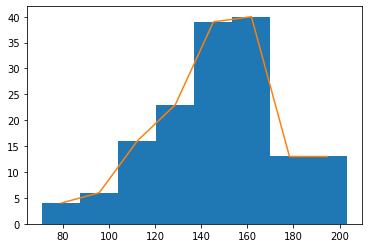

In [173]:
freq2, edges= np.histogram(bucesp1vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucesp1vec,bins1)
plt.plot(X,Y)
plt.show()

Se procede a construir el BoxPlot (Diagrama de cajas) en el cual se pueden apreciar variables como el sesgo, la mediana y algunos valores muy alejados del promedio.

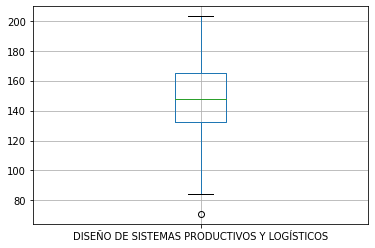

In [174]:
dfinalBucaramanga.boxplot(column='DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS')

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA ESPECÍFICA: FORMULACIÓN DE PROYECTOS DE INGENIERÍA

Es el mismo procedimiento para las demás pruebas tanto específicas como genéricas, cambiando las variables obtendremos con facilidad los diagramas y frecuencias para proceder a analizarlos.

In [175]:
da=dfinalBucaramanga[dfinalBucaramanga['FORMULACIÓN DE PROYECTOS DE INGENIERÍA']>0]
bucesp2=da.iloc[0:155][['FORMULACIÓN DE PROYECTOS DE INGENIERÍA']] 
bucesp2.head()


,FORMULACIÓN DE PROYECTOS DE INGENIERÍA
0,151
1,132
2,190
3,200
4,123


In [176]:
bucesp2vec=np.ravel(bucesp2)
bucesp2vec.shape

(154,)

In [177]:
rango=np.max(bucesp2vec)-np.min(bucesp2vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucesp2vec)-0.0005, np.max(bucesp2vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucesp2vec, bins1)
freq = [len(bucesp2vec[binplace == i]) for i in range (1, len(bins1))]

In [178]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[84.00,99.87)
[99.87,115.75)
[115.75,131.62)
[131.62,147.50)
[147.50,163.38)
[163.38,179.25)
[179.25,195.13)
[195.13,211.00)


,Intervalo,Frecuencia
0,"[84.00,99.87)",2
1,"[99.87,115.75)",10
2,"[115.75,131.62)",17
3,"[131.62,147.50)",31
4,"[147.50,163.38)",34
5,"[163.38,179.25)",32
6,"[179.25,195.13)",22
7,"[195.13,211.00)",6


[ 91.9370625 107.8121875 123.6873125 139.5624375 155.4375625 171.3126875
 187.1878125 203.0629375]
[ 2 10 17 31 34 32 22  6]


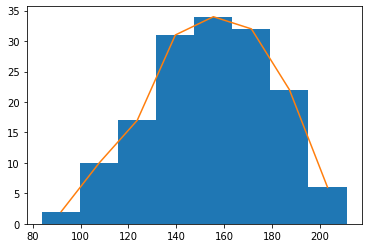

In [179]:
freq2, edges= np.histogram(bucesp2vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucesp2vec,bins1)
plt.plot(X,Y)
plt.show()

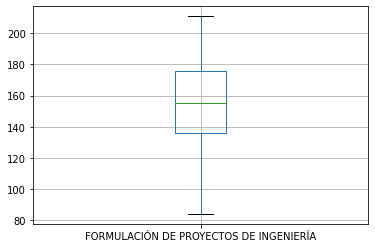

In [180]:
dfinalBucaramanga.boxplot(column='FORMULACIÓN DE PROYECTOS DE INGENIERÍA')



UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA ESPECÍFICA: PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA

In [181]:
da=dfinalBucaramanga[dfinalBucaramanga['PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA']>0]
bucesp3=da.iloc[0:155][['PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA']] 
bucesp3.head()

,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA
0,160
1,95
2,143
3,188
4,102


In [182]:
bucesp3vec=np.ravel(bucesp3)
bucesp3vec.shape

(154,)

In [183]:
rango=np.max(bucesp3vec)-np.min(bucesp3vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucesp3vec)-0.0005, np.max(bucesp3vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucesp3vec, bins1)
freq = [len(bucesp3vec[binplace == i]) for i in range (1, len(bins1))]

In [184]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[89.00,105.37)
[105.37,121.75)
[121.75,138.12)
[138.12,154.50)
[154.50,170.88)
[170.88,187.25)
[187.25,203.63)
[203.63,220.00)


,Intervalo,Frecuencia
0,"[89.00,105.37)",6
1,"[105.37,121.75)",36
2,"[121.75,138.12)",47
3,"[138.12,154.50)",33
4,"[154.50,170.88)",19
5,"[170.88,187.25)",10
6,"[187.25,203.63)",1
7,"[203.63,220.00)",2


[ 97.1870625 113.5621875 129.9373125 146.3124375 162.6875625 179.0626875
 195.4378125 211.8129375]
[ 6 36 47 33 19 10  1  2]


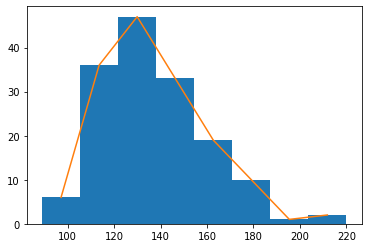

In [185]:
freq2, edges= np.histogram(bucesp3vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucesp3vec,bins1)
plt.plot(X,Y)
plt.show()

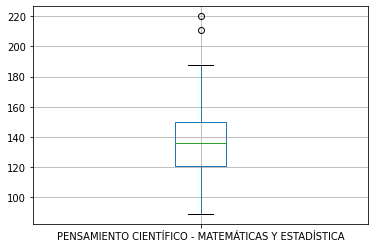

In [186]:
dfinalBucaramanga.boxplot(column='PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA')

## GENÉRICAS PONTIFICIA BOLIVARIANA-BUCARAMANGA

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA GENÉRICA: MODALIDAD RAZONAMIENTO CUANTITATIVO PUNTAJE.

In [56]:
da=dfinalBucaramanga[dfinalBucaramanga['MOD_RAZONA_CUANTITAT_PUNT']>0]
bucgenp1=da.iloc[0:155][['MOD_RAZONA_CUANTITAT_PUNT']] 
bucgenp1.head()

,MOD_RAZONA_CUANTITAT_PUNT
0,174
1,155
2,196
3,225
4,119


In [57]:
bucgenp1vec=np.ravel(bucgenp1)
bucgenp1vec.shape

(154,)

In [58]:
rango=np.max(bucgenp1vec)-np.min(bucgenp1vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucgenp1vec)-0.0005, np.max(bucgenp1vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucgenp1vec, bins1)
freq = [len(bucgenp1vec[binplace == i]) for i in range (1, len(bins1))]

In [59]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[100.00,116.25)
[116.25,132.50)
[132.50,148.75)
[148.75,165.00)
[165.00,181.25)
[181.25,197.50)
[197.50,213.75)
[213.75,230.00)


,Intervalo,Frecuencia
0,"[100.00,116.25)",3
1,"[116.25,132.50)",7
2,"[132.50,148.75)",14
3,"[148.75,165.00)",32
4,"[165.00,181.25)",36
5,"[181.25,197.50)",34
6,"[197.50,213.75)",21
7,"[213.75,230.00)",7


[108.1245625 124.3746875 140.6248125 156.8749375 173.1250625 189.3751875
 205.6253125 221.8754375]
[ 3  7 14 32 36 34 21  7]


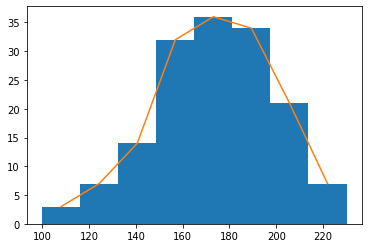

In [60]:
freq2, edges= np.histogram(bucgenp1vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucgenp1vec,bins1)
plt.plot(X,Y)
plt.show()

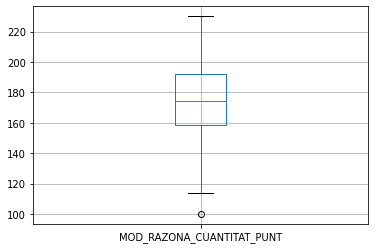

In [61]:
dfinalBucaramanga.boxplot(column='MOD_RAZONA_CUANTITAT_PUNT')

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA GENÉRICA: MODALIDAD LECTURA CRITICA PUNTAJE.

In [62]:
da=dfinalBucaramanga[dfinalBucaramanga['MOD_LECTURA_CRITICA_PUNT']>0]
bucgenp2=da.iloc[0:155][['MOD_LECTURA_CRITICA_PUNT']] 
bucgenp2.head()

,MOD_LECTURA_CRITICA_PUNT
0,148
1,144
2,182
3,204
4,144


In [63]:
bucgenp2vec=np.ravel(bucgenp2)
bucgenp2vec.shape

(154,)

In [64]:
rango=np.max(bucgenp2vec)-np.min(bucgenp2vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucgenp2vec)-0.0005, np.max(bucgenp2vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucgenp2vec, bins1)
freq = [len(bucgenp2vec[binplace == i]) for i in range (1, len(bins1))]

In [65]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[90.00,106.37)
[106.37,122.75)
[122.75,139.12)
[139.12,155.50)
[155.50,171.88)
[171.88,188.25)
[188.25,204.63)
[204.63,221.00)


,Intervalo,Frecuencia
0,"[90.00,106.37)",5
1,"[106.37,122.75)",10
2,"[122.75,139.12)",21
3,"[139.12,155.50)",30
4,"[155.50,171.88)",29
5,"[171.88,188.25)",30
6,"[188.25,204.63)",20
7,"[204.63,221.00)",9


[ 98.1870625 114.5621875 130.9373125 147.3124375 163.6875625 180.0626875
 196.4378125 212.8129375]
[ 5 10 21 30 29 30 20  9]


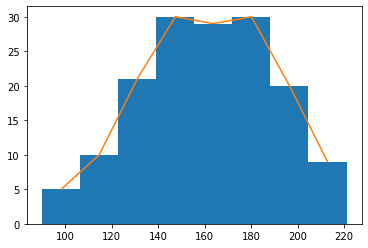

In [66]:
freq2, edges= np.histogram(bucgenp2vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucgenp2vec,bins1)
plt.plot(X,Y)
plt.show()

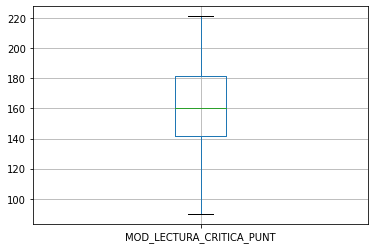

In [67]:
dfinalBucaramanga.boxplot(column='MOD_LECTURA_CRITICA_PUNT')

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA GENÉRICA: MODALIDAD COMPETENCIAS CIUDADANAS PUNTAJE.

In [68]:
da=dfinalBucaramanga[dfinalBucaramanga['MOD_COMPETEN_CIUDADA_PUNT']>0]
bucgenp3=da.iloc[0:155][['MOD_COMPETEN_CIUDADA_PUNT']] 
bucgenp3.head()

,MOD_COMPETEN_CIUDADA_PUNT
0,170
1,147
2,195
3,185
4,130


In [69]:
bucgenp3vec=np.ravel(bucgenp3)
bucgenp3vec.shape

(154,)

In [70]:
rango=np.max(bucgenp3vec)-np.min(bucgenp3vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucgenp3vec)-0.0005, np.max(bucgenp3vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucgenp3vec, bins1)
freq = [len(bucgenp3vec[binplace == i]) for i in range (1, len(bins1))]

In [71]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[66.00,84.87)
[84.87,103.75)
[103.75,122.62)
[122.62,141.50)
[141.50,160.38)
[160.38,179.25)
[179.25,198.13)
[198.13,217.00)


,Intervalo,Frecuencia
0,"[66.00,84.87)",4
1,"[84.87,103.75)",9
2,"[103.75,122.62)",14
3,"[122.62,141.50)",22
4,"[141.50,160.38)",45
5,"[160.38,179.25)",30
6,"[179.25,198.13)",20
7,"[198.13,217.00)",10


[ 75.4370625  94.3121875 113.1873125 132.0624375 150.9375625 169.8126875
 188.6878125 207.5629375]
[ 4  9 14 22 45 30 20 10]


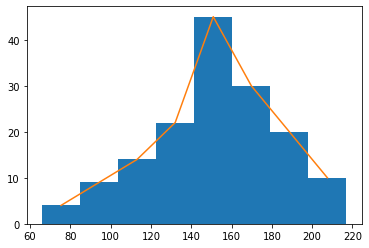

In [72]:
freq2, edges= np.histogram(bucgenp3vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucgenp3vec,bins1)
plt.plot(X,Y)
plt.show()

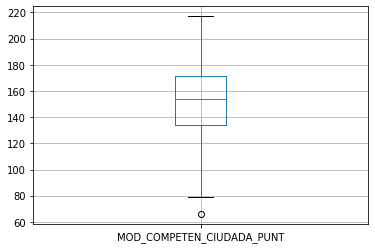

In [73]:
dfinalBucaramanga.boxplot(column='MOD_COMPETEN_CIUDADA_PUNT')

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA GENÉRICA: MODALIDAD INGLES PUNTAJE.

In [74]:
da=dfinalBucaramanga[dfinalBucaramanga['MOD_INGLES_PUNT']>0]
bucgenp4=da.iloc[0:155][['MOD_INGLES_PUNT']] 
bucgenp4.head()

,MOD_INGLES_PUNT
0,159.0
1,169.0
2,200.0
3,210.0
4,152.0


In [75]:
bucgenp4vec=np.ravel(bucgenp4)
bucgenp4vec.shape

(154,)

In [76]:
rango=np.max(bucgenp4vec)-np.min(bucgenp4vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucgenp4vec)-0.0005, np.max(bucgenp4vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucgenp4vec, bins1)
freq = [len(bucgenp4vec[binplace == i]) for i in range (1, len(bins1))]

In [77]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[78.00,96.75)
[96.75,115.50)
[115.50,134.25)
[134.25,153.00)
[153.00,171.75)
[171.75,190.50)
[190.50,209.25)
[209.25,228.00)


,Intervalo,Frecuencia
0,"[78.00,96.75)",1
1,"[96.75,115.50)",1
2,"[115.50,134.25)",9
3,"[134.25,153.00)",18
4,"[153.00,171.75)",42
5,"[171.75,190.50)",39
6,"[190.50,209.25)",32
7,"[209.25,228.00)",12


[ 87.3745625 106.1246875 124.8748125 143.6249375 162.3750625 181.1251875
 199.8753125 218.6254375]
[ 1  1  9 18 42 39 32 12]


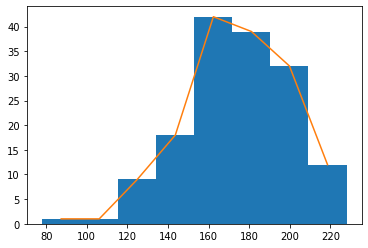

In [78]:
freq2, edges= np.histogram(bucgenp4vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucgenp4vec,bins1)
plt.plot(X,Y)
plt.show()

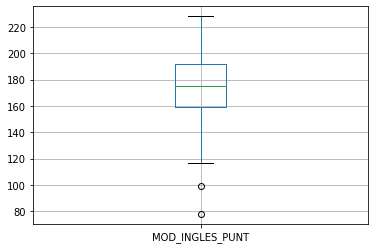

In [79]:
dfinalBucaramanga.boxplot(column='MOD_INGLES_PUNT')

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA GENÉRICA: MODALIDAD COMUNICACIÓN ESCRITA PUNTAJE.

In [80]:
da=dfinalBucaramanga[dfinalBucaramanga['MOD_COMUNI_ESCRITA_PUNT']>0]
bucgenp5=da.iloc[0:155][['MOD_COMUNI_ESCRITA_PUNT']] 
bucgenp5.head()

,MOD_COMUNI_ESCRITA_PUNT
0,184.0
1,115.0
2,198.0
3,135.0
4,90.0


In [81]:
bucgenp5vec=np.ravel(bucgenp5)
bucgenp5vec.shape

(151,)

In [82]:
rango=np.max(bucgenp5vec)-np.min(bucgenp5vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucgenp5vec)-0.0005, np.max(bucgenp5vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucgenp5vec, bins1)
freq = [len(bucgenp5vec[binplace == i]) for i in range (1, len(bins1))]

In [83]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table


[90.00,107.12)
[107.12,124.25)
[124.25,141.37)
[141.37,158.50)
[158.50,175.63)
[175.63,192.75)
[192.75,209.88)
[209.88,227.00)


,Intervalo,Frecuencia
0,"[90.00,107.12)",6
1,"[107.12,124.25)",11
2,"[124.25,141.37)",43
3,"[141.37,158.50)",26
4,"[158.50,175.63)",30
5,"[175.63,192.75)",20
6,"[192.75,209.88)",13
7,"[209.88,227.00)",2


[ 98.5620625 115.6871875 132.8123125 149.9374375 167.0625625 184.1876875
 201.3128125 218.4379375]
[ 6 11 43 26 30 20 13  2]


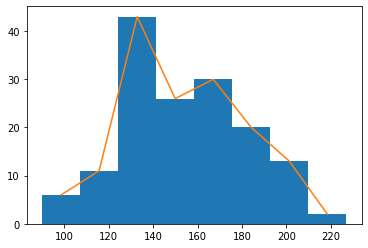

In [84]:
freq2, edges= np.histogram(bucgenp5vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucgenp5vec,bins1)
plt.plot(X,Y)
plt.show()

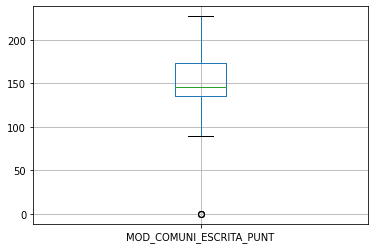

In [85]:
dfinalBucaramanga.boxplot(column='MOD_COMUNI_ESCRITA_PUNT')

UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA. PRUEBA GENÉRICA: PUNTAJE GLOBAL.

In [86]:
da=dfinalBucaramanga[dfinalBucaramanga['PUNT_GLOBAL']>0]
bucgenpg=da.iloc[0:155][['PUNT_GLOBAL']] 
bucgenpg.head()

,PUNT_GLOBAL
0,167
1,146
2,194
3,192
4,127


In [87]:
bucgenpgvec=np.ravel(bucgenpg)
bucgenpgvec.shape


(154,)

In [88]:
rango=np.max(bucgenpgvec)-np.min(bucgenpgvec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(bucgenpgvec)-0.0005, np.max(bucgenpgvec)+0.0005, (nIntervalos+1))
binplace= np.digitize(bucgenpgvec, bins1)
freq = [len(bucgenpgvec[binplace == i]) for i in range (1, len(bins1))]

In [89]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[118.00,130.50)
[130.50,143.00)
[143.00,155.50)
[155.50,168.00)
[168.00,180.50)
[180.50,193.00)
[193.00,205.50)
[205.50,218.00)


,Intervalo,Frecuencia
0,"[118.00,130.50)",8
1,"[130.50,143.00)",18
2,"[143.00,155.50)",32
3,"[155.50,168.00)",39
4,"[168.00,180.50)",30
5,"[180.50,193.00)",18
6,"[193.00,205.50)",8
7,"[205.50,218.00)",1


[124.2495625 136.7496875 149.2498125 161.7499375 174.2500625 186.7501875
 199.2503125 211.7504375]
[ 8 18 32 39 30 18  8  1]


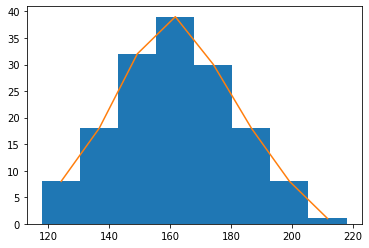

In [90]:
freq2, edges= np.histogram(bucgenpgvec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(bucgenpgvec,bins1)
plt.plot(X,Y)
plt.show()

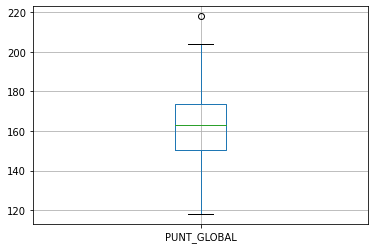

In [91]:
dfinalBucaramanga.boxplot(column='PUNT_GLOBAL')

## ESPECIFICAS UNIVERSIDAD DE LA COSTA

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA ESPECÍFICA: DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS

In [92]:
da=dfinalcuc[dfinalcuc['DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS']>0]
cucesp1=da.iloc[0:155][['DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS']] 
cucesp1.head()

,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS
0,126
1,138
2,164
3,167
4,151


In [93]:
cucesp1vec=np.ravel(cucesp1)
cucesp1vec.shape

(155,)

In [94]:
rango=np.max(cucesp1vec)-np.min(cucesp1vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucesp1vec)-0.0005, np.max(cucesp1vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucesp1vec, bins1)
freq = [len(cucesp1vec[binplace == i]) for i in range (1, len(bins1))]

In [95]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[59.00,78.87)
[78.87,98.75)
[98.75,118.62)
[118.62,138.50)
[138.50,158.38)
[158.38,178.25)
[178.25,198.13)
[198.13,218.00)


,Intervalo,Frecuencia
0,"[59.00,78.87)",2
1,"[78.87,98.75)",14
2,"[98.75,118.62)",25
3,"[118.62,138.50)",53
4,"[138.50,158.38)",35
5,"[158.38,178.25)",20
6,"[178.25,198.13)",5
7,"[198.13,218.00)",1


[ 68.9370625  88.8121875 108.6873125 128.5624375 148.4375625 168.3126875
 188.1878125 208.0629375]
[ 2 14 25 53 35 20  5  1]


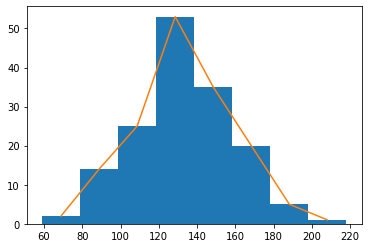

In [96]:
freq2, edges= np.histogram(cucesp1vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucesp1vec,bins1)
plt.plot(X,Y)
plt.show()

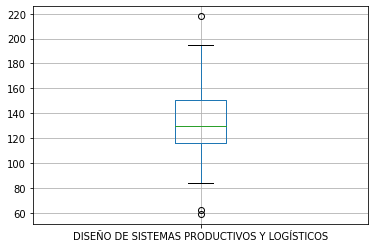

In [97]:
dfinalcuc.boxplot(column='DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS')

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA ESPECÍFICA: FORMULACIÓN DE PROYECTOS DE INGENIERÍA.

In [98]:
da=dfinalcuc[dfinalcuc['FORMULACIÓN DE PROYECTOS DE INGENIERÍA']>0]
cucesp2=da.iloc[0:155][['FORMULACIÓN DE PROYECTOS DE INGENIERÍA']] 
cucesp2.head()

,FORMULACIÓN DE PROYECTOS DE INGENIERÍA
0,159
1,153
2,148
3,152
4,149


In [99]:
cucesp2vec=np.ravel(cucesp2)
cucesp2vec.shape

(155,)

In [100]:
rango=np.max(cucesp2vec)-np.min(cucesp2vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucesp2vec)-0.0005, np.max(cucesp2vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucesp2vec, bins1)
freq = [len(cucesp2vec[binplace == i]) for i in range (1, len(bins1))]


In [101]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[59.00,76.50)
[76.50,94.00)
[94.00,111.50)
[111.50,129.00)
[129.00,146.50)
[146.50,164.00)
[164.00,181.50)
[181.50,199.00)


,Intervalo,Frecuencia
0,"[59.00,76.50)",5
1,"[76.50,94.00)",9
2,"[94.00,111.50)",20
3,"[111.50,129.00)",25
4,"[129.00,146.50)",37
5,"[146.50,164.00)",34
6,"[164.00,181.50)",18
7,"[181.50,199.00)",7


[ 67.7495625  85.2496875 102.7498125 120.2499375 137.7500625 155.2501875
 172.7503125 190.2504375]
[ 5  9 20 25 37 34 18  7]


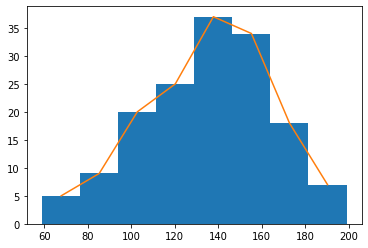

In [102]:
freq2, edges= np.histogram(cucesp2vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucesp2vec,bins1)
plt.plot(X,Y)
plt.show()

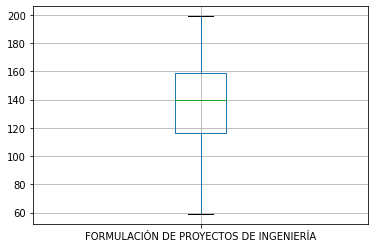

In [103]:
dfinalcuc.boxplot(column='FORMULACIÓN DE PROYECTOS DE INGENIERÍA')

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA ESPECÍFICA: PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA.

In [104]:
da=dfinalcuc[dfinalcuc['PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA']>0]
cucesp3=da.iloc[0:155][['PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA']] 
cucesp3.head()

,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA
0,127
1,108
2,122
3,122
4,149


In [105]:
cucesp3vec=np.ravel(cucesp3)
cucesp3vec.shape

(155,)

In [106]:
rango=np.max(cucesp3vec)-np.min(cucesp3vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucesp3vec)-0.0005, np.max(cucesp3vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucesp3vec, bins1)
freq = [len(cucesp3vec[binplace == i]) for i in range (1, len(bins1))]

In [107]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[77.00,87.87)
[87.87,98.75)
[98.75,109.62)
[109.62,120.50)
[120.50,131.38)
[131.38,142.25)
[142.25,153.13)
[153.13,164.00)


,Intervalo,Frecuencia
0,"[77.00,87.87)",3
1,"[87.87,98.75)",7
2,"[98.75,109.62)",33
3,"[109.62,120.50)",37
4,"[120.50,131.38)",41
5,"[131.38,142.25)",13
6,"[142.25,153.13)",13
7,"[153.13,164.00)",8


[ 82.4370625  93.3121875 104.1873125 115.0624375 125.9375625 136.8126875
 147.6878125 158.5629375]
[ 3  7 33 37 41 13 13  8]


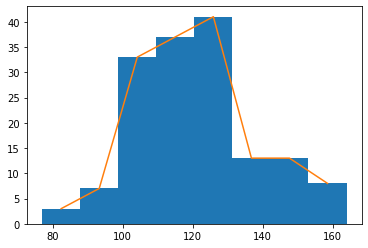

In [108]:
freq2, edges= np.histogram(cucesp3vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucesp3vec,bins1)
plt.plot(X,Y)
plt.show()

## GENÉRICAS UNIVERSIDAD DE LA COSTA

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA GENÉRICA: MODALIDAD RAZONAMIENTO CUANTITATIVO PUNTAJE.

In [109]:
da=dfinalcuc[dfinalcuc['MOD_RAZONA_CUANTITAT_PUNT']>0]
cucgenp1=da.iloc[0:155][['MOD_RAZONA_CUANTITAT_PUNT']] 
cucgenp1.head()

,MOD_RAZONA_CUANTITAT_PUNT
0,123
1,153
2,158
3,185
4,188


In [110]:
cucgenp1vec=np.ravel(cucgenp1)
cucgenp1vec.shape

(155,)

In [111]:
rango=np.max(cucgenp1vec)-np.min(cucgenp1vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucgenp1vec)-0.0005, np.max(cucgenp1vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucgenp1vec, bins1)
freq = [len(cucgenp1vec[binplace == i]) for i in range (1, len(bins1))]

In [112]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[82.00,98.75)
[98.75,115.50)
[115.50,132.25)
[132.25,149.00)
[149.00,165.75)
[165.75,182.50)
[182.50,199.25)
[199.25,216.00)


,Intervalo,Frecuencia
0,"[82.00,98.75)",4
1,"[98.75,115.50)",12
2,"[115.50,132.25)",24
3,"[132.25,149.00)",26
4,"[149.00,165.75)",41
5,"[165.75,182.50)",32
6,"[182.50,199.25)",11
7,"[199.25,216.00)",5


[ 90.3745625 107.1246875 123.8748125 140.6249375 157.3750625 174.1251875
 190.8753125 207.6254375]
[ 4 12 24 26 41 32 11  5]


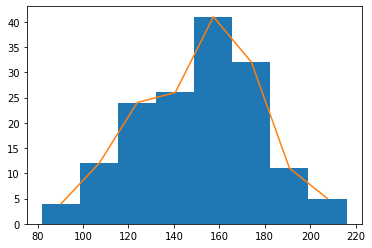

In [113]:
freq2, edges= np.histogram(cucgenp1vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucgenp1vec,bins1)
plt.plot(X,Y)
plt.show()

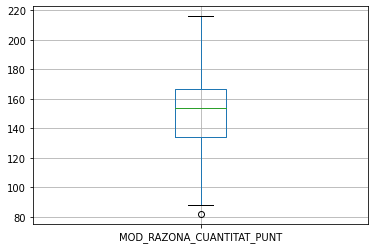

In [114]:
dfinalcuc.boxplot(column='MOD_RAZONA_CUANTITAT_PUNT')

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA GENÉRICA: MODALIDAD LECTURA CRÍTICA PUNTAJE.

In [115]:
da=dfinalcuc[dfinalcuc['MOD_LECTURA_CRITICA_PUNT']>0]
cucgenp2=da.iloc[0:155][['MOD_LECTURA_CRITICA_PUNT']] 
cucgenp2.head()

,MOD_LECTURA_CRITICA_PUNT
0,184
1,158
2,99
3,173
4,178


In [116]:
cucgenp2vec=np.ravel(cucgenp2)
cucgenp2vec.shape

(155,)

In [117]:
rango=np.max(cucgenp2vec)-np.min(cucgenp2vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucgenp2vec)-0.0005, np.max(cucgenp2vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucgenp2vec, bins1)
freq = [len(cucgenp2vec[binplace == i]) for i in range (1, len(bins1))]

In [118]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[61.00,79.00)
[79.00,97.00)
[97.00,115.00)
[115.00,133.00)
[133.00,151.00)
[151.00,169.00)
[169.00,187.00)
[187.00,205.00)


,Intervalo,Frecuencia
0,"[61.00,79.00)",2
1,"[79.00,97.00)",9
2,"[97.00,115.00)",20
3,"[115.00,133.00)",29
4,"[133.00,151.00)",37
5,"[151.00,169.00)",29
6,"[169.00,187.00)",25
7,"[187.00,205.00)",4


[ 69.9995625  87.9996875 105.9998125 123.9999375 142.0000625 160.0001875
 178.0003125 196.0004375]
[ 2  9 20 29 37 29 25  4]


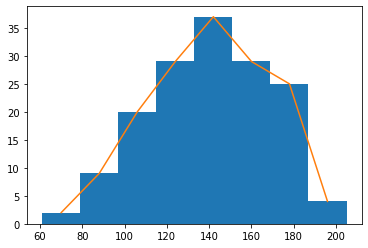

In [119]:
freq2, edges= np.histogram(cucgenp2vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucgenp2vec,bins1)
plt.plot(X,Y)
plt.show()

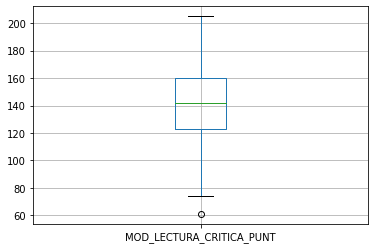

In [120]:
dfinalcuc.boxplot(column='MOD_LECTURA_CRITICA_PUNT')

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA GENÉRICA: MODALIDAD COMPETENCIAS CIUDADANAS PUNTAJE.

In [121]:
da=dfinalcuc[dfinalcuc['MOD_COMPETEN_CIUDADA_PUNT']>0]
cucgenp3=da.iloc[0:155][['MOD_COMPETEN_CIUDADA_PUNT']] 
cucgenp3.head()

,MOD_COMPETEN_CIUDADA_PUNT
0,144
1,202
2,96
3,151
4,169


In [122]:
cucgenp3vec=np.ravel(cucgenp3)
cucgenp3vec.shape

(155,)

In [123]:
rango=np.max(cucgenp3vec)-np.min(cucgenp3vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucgenp3vec)-0.0005, np.max(cucgenp3vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucgenp3vec, bins1)
freq = [len(cucgenp3vec[binplace == i]) for i in range (1, len(bins1))]

In [124]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[67.00,84.37)
[84.37,101.75)
[101.75,119.12)
[119.12,136.50)
[136.50,153.88)
[153.88,171.25)
[171.25,188.63)
[188.63,206.00)


,Intervalo,Frecuencia
0,"[67.00,84.37)",10
1,"[84.37,101.75)",22
2,"[101.75,119.12)",26
3,"[119.12,136.50)",31
4,"[136.50,153.88)",27
5,"[153.88,171.25)",21
6,"[171.25,188.63)",15
7,"[188.63,206.00)",3


[ 75.6870625  93.0621875 110.4373125 127.8124375 145.1875625 162.5626875
 179.9378125 197.3129375]
[10 22 26 31 27 21 15  3]


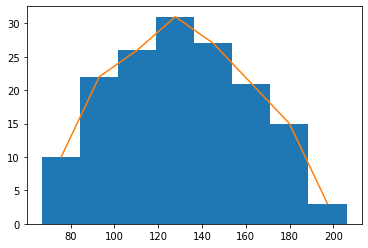

In [125]:
freq2, edges= np.histogram(cucgenp3vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucgenp3vec,bins1)
plt.plot(X,Y)
plt.show()

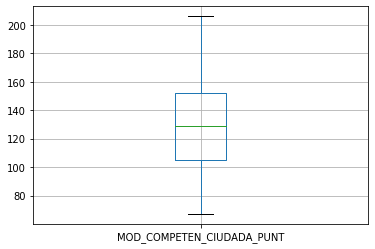

In [126]:
dfinalcuc.boxplot(column='MOD_COMPETEN_CIUDADA_PUNT')

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA GENÉRICA: MODALIDAD INGLÉS PUNTAJE.

In [127]:
da=dfinalcuc[dfinalcuc['MOD_INGLES_PUNT']>0]
cucgenp4=da.iloc[0:155][['MOD_INGLES_PUNT']] 
cucgenp4.head()

,MOD_INGLES_PUNT
0,162.0
1,178.0
2,142.0
3,141.0
4,180.0


In [128]:
cucgenp4vec=np.ravel(cucgenp4)
cucgenp4vec.shape

(155,)

In [129]:
rango=np.max(cucgenp4vec)-np.min(cucgenp4vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucgenp4vec)-0.0005, np.max(cucgenp4vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucgenp4vec, bins1)
freq = [len(cucgenp4vec[binplace == i]) for i in range (1, len(bins1))]

In [130]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[95.00,111.87)
[111.87,128.75)
[128.75,145.62)
[145.62,162.50)
[162.50,179.38)
[179.38,196.25)
[196.25,213.13)
[213.13,230.00)


,Intervalo,Frecuencia
0,"[95.00,111.87)",11
1,"[111.87,128.75)",16
2,"[128.75,145.62)",39
3,"[145.62,162.50)",35
4,"[162.50,179.38)",25
5,"[179.38,196.25)",20
6,"[196.25,213.13)",6
7,"[213.13,230.00)",3


[103.4370625 120.3121875 137.1873125 154.0624375 170.9375625 187.8126875
 204.6878125 221.5629375]
[11 16 39 35 25 20  6  3]


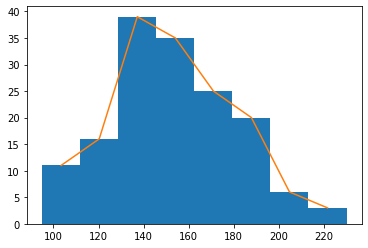

In [131]:
freq2, edges= np.histogram(cucgenp4vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucgenp4vec,bins1)
plt.plot(X,Y)
plt.show()

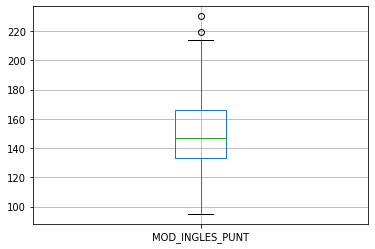

In [132]:
dfinalcuc.boxplot(column='MOD_INGLES_PUNT')

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA GENÉRICA: MODALIDAD COMUNICACIÓN ESCRITA PUNTAJE.

In [133]:
da=dfinalcuc[dfinalcuc['MOD_COMUNI_ESCRITA_PUNT']>0]
cucgenp5=da.iloc[0:155][['MOD_COMUNI_ESCRITA_PUNT']] 
cucgenp5.head()

,MOD_COMUNI_ESCRITA_PUNT
0,101.0
1,127.0
2,130.0
3,180.0
4,195.0


In [134]:
cucgenp5vec=np.ravel(cucgenp5)
cucgenp5vec.shape

(155,)

In [135]:
rango=np.max(cucgenp5vec)-np.min(cucgenp5vec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucgenp5vec)-0.0005, np.max(cucgenp5vec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucgenp5vec, bins1)
freq = [len(cucgenp5vec[binplace == i]) for i in range (1, len(bins1))]

In [136]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[101.00,117.25)
[117.25,133.50)
[133.50,149.75)
[149.75,166.00)
[166.00,182.25)
[182.25,198.50)
[198.50,214.75)
[214.75,231.00)


,Intervalo,Frecuencia
0,"[101.00,117.25)",19
1,"[117.25,133.50)",20
2,"[133.50,149.75)",58
3,"[149.75,166.00)",23
4,"[166.00,182.25)",25
5,"[182.25,198.50)",7
6,"[198.50,214.75)",2
7,"[214.75,231.00)",1


[109.1245625 125.3746875 141.6248125 157.8749375 174.1250625 190.3751875
 206.6253125 222.8754375]
[19 20 58 23 25  7  2  1]


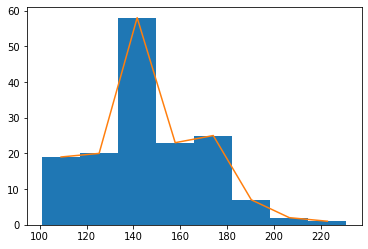

In [137]:
freq2, edges= np.histogram(cucgenp5vec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucgenp5vec,bins1)
plt.plot(X,Y)
plt.show()

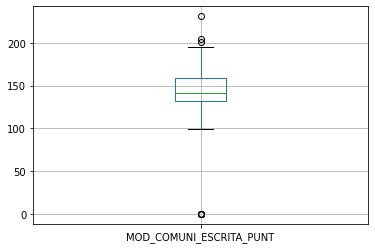

In [138]:
dfinalcuc.boxplot(column='MOD_COMUNI_ESCRITA_PUNT')

CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA. PRUEBA GENÉRICA: PUNTAJE GLOBAL.


In [139]:
da=dfinalcuc[dfinalcuc['PUNT_GLOBAL']>0]
cucgenp=da.iloc[0:155][['PUNT_GLOBAL']] 
cucgenp.head()


,PUNT_GLOBAL
0,143
1,164
2,125
3,166
4,182


In [140]:
cucgenpvec=np.ravel(cucgenp)
cucgenpvec.shape

(155,)

In [141]:
rango=np.max(cucgenpvec)-np.min(cucgenpvec)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(cucgenpvec)-0.0005, np.max(cucgenpvec)+0.0005, (nIntervalos+1))
binplace= np.digitize(cucgenpvec, bins1)
freq = [len(cucgenpvec[binplace == i]) for i in range (1, len(bins1))]

In [142]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
  print(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

[87.00,99.62)
[99.62,112.25)
[112.25,124.87)
[124.87,137.50)
[137.50,150.13)
[150.13,162.75)
[162.75,175.38)
[175.38,188.00)


,Intervalo,Frecuencia
0,"[87.00,99.62)",1
1,"[99.62,112.25)",3
2,"[112.25,124.87)",18
3,"[124.87,137.50)",43
4,"[137.50,150.13)",40
5,"[150.13,162.75)",22
6,"[162.75,175.38)",16
7,"[175.38,188.00)",12


[ 93.3120625 105.9371875 118.5623125 131.1874375 143.8125625 156.4376875
 169.0628125 181.6879375]
[ 1  3 18 43 40 22 16 12]


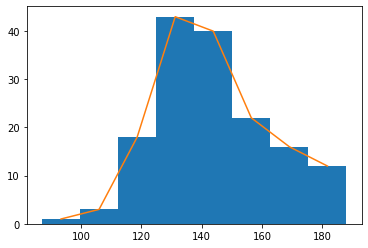

In [143]:
freq2, edges= np.histogram(cucgenpvec,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(cucgenpvec,bins1)
plt.plot(X,Y)
plt.show()

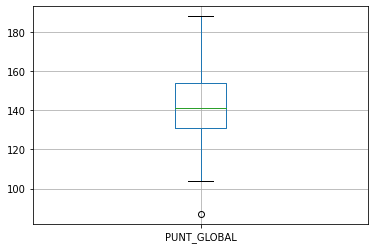

In [144]:
dfinalcuc.boxplot(column='PUNT_GLOBAL')

## ¿Qué conclusiones puede obtenerse de estos gráficos? 

Por medio de los histogramas y diagramas de cajas se pueden sacar las siguientes conclusiones:


1.   Las medianas en la mayoría de las pruebas y competencias se mantuvieron con un cierto comportamiento de normalidad.
2.   Los sesgos no se pueden apreciar con claridad, ya que la desviación estándar no fue significativa.
3.   Existen valores en los que se salen de los cuartiles del diagrama de cajas, a estos valores se les denomina como datos atípicos, ya sea que estén por debajo del primer cuartil o por encima del tercero.
4.   En algunos pruebas, como la de Matemáticas el comportamiento del histograma fue asimétrico hacia la izquierda para ámbas universidades, teniendo un desempeño regular en esa competencia específica.
5.   Se puede decir que en los mejores resultados, el comportamiento fue como el de una curva exponencial.


*En general estos gráficos brindan muy buena información para analizar, ya que con solo tener un momento para distinguirlos, se logra sacar conclusiones rápidas y eficaces*











A continuación se presentan todos los histogramas y BoxPlot agrupados por Universidad y pruebas:


Histogramas UNIVERSIDAD DE LA COSTA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5020f94978>,
      dtype=object)

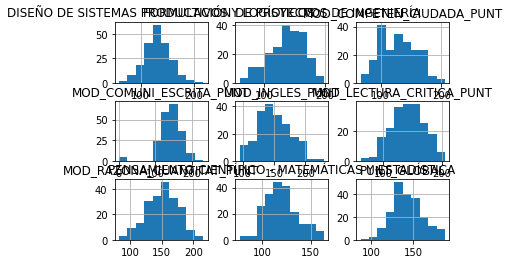

In [187]:
dfinalcuc.hist()

Histogramas PONTIFICIA BOLIVARIANA-BUCARAMANGA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5020be8f28>,
      dtype=object)

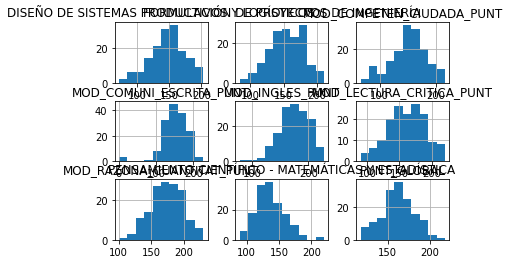

In [188]:
dfinalBucaramanga.hist()

Diagramas de cajas UNIVERSIDAD DE LA COSTA

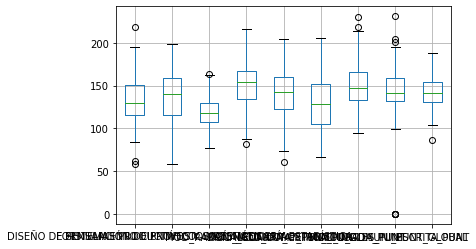

In [189]:
dfinalcuc.boxplot()

Diagramas de cajas PONTIFICIA BOLIVARIANA-BUCARAMANGA

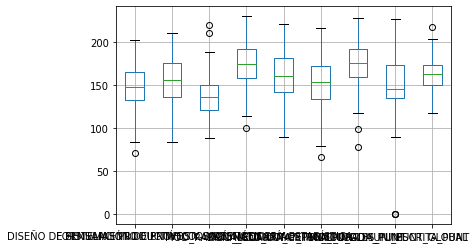

In [190]:
dfinalBucaramanga.boxplot()

## MEDIDAS DE DISPERSIÓN

 Calcule la media, cuartiles y desviación estándar de para los estudiantes del programa de ingeniería industrial para cada una de las dos universidades y para cada una de las competencias  ¿Hay evidencias de un mejor o peor desempeño de los estudiantes del programa de ingeniería industrial en los resultados de las pruebas Saber Pro para alguna de las dos universidades?

Con la función *describe()* de pandas se obtiene de manera rápida las medidas de dispersión comunes como:
La media, los cuartiles, máximos y mínimos, desviación estándar, etc.

In [145]:
dfinalBucaramanga.describe()

,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,147.753247,154.694805,136.993506,173.629870,161.006494,151.577922,174.071429,150.857143,162.233766
std,27.034790,25.703520,22.333918,25.269515,28.018551,31.627278,25.717954,34.244494,19.323795
min,71.000000,84.000000,89.000000,100.000000,90.000000,66.000000,78.000000,0.000000,118.000000
25%,132.250000,136.250000,121.000000,158.250000,142.000000,134.250000,159.000000,135.000000,150.250000
50%,147.500000,155.500000,136.000000,174.000000,160.000000,154.000000,175.500000,145.500000,163.000000
75%,165.000000,176.000000,149.750000,191.750000,181.750000,171.750000,192.000000,173.000000,173.750000
max,203.000000,211.000000,220.000000,230.000000,221.000000,217.000000,228.000000,227.000000,218.000000


In [146]:
dfinalcuc.describe()

,DISEÑO DE SISTEMAS PRODUCTIVOS Y LOGÍSTICOS,FORMULACIÓN DE PROYECTOS DE INGENIERÍA,PENSAMIENTO CIENTÍFICO - MATEMÁTICAS Y ESTADÍSTICA,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,132.602941,136.617647,120.147059,151.205882,141.191176,129.382353,150.406863,141.186275,142.686275
std,24.644151,28.594858,16.756675,25.023866,27.459378,29.554173,26.475682,31.984211,17.935835
min,59.000000,59.000000,77.000000,82.000000,61.000000,67.000000,95.000000,0.000000,87.000000
25%,116.000000,116.000000,108.000000,134.000000,122.750000,105.000000,133.000000,131.750000,131.000000
50%,130.000000,140.000000,118.500000,154.000000,142.000000,129.000000,147.000000,141.000000,141.000000
75%,150.250000,159.000000,130.000000,167.000000,160.250000,152.000000,166.000000,159.000000,154.000000
max,218.000000,199.000000,164.000000,216.000000,205.000000,206.000000,230.000000,231.000000,188.000000


CONCLUSIONES:


*   Analizando las medias, la UNIVERSIDAD PONTIFICIA BOLIVARIANA-BUCARAMANGA es superior en TODAS las pruebas en comparación con la CORPORACIÓN UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA.
*   La desviación estándar fue menor en la mayoría de las pruebas que se les realizó a los estudiantes de la  CUC, esto significa que las calificaciones son similares.
*   El mejor desempeño de la Universidad de Bucaramanga es en la prueba genérica de Inglés, y su peor fue en Matemáticas y Estadística.
*   El mejor desempeño de la CUC fue en la prueba específica de Razonamiento Cuantitativo, y su peor fue en Matemáticas y Estadística.

En general, los estudiantes de la Universidad de Bucaramanga tuvieron un mejor desempeño que la CUC, ya que el mínimo y máximo puntaje superan por más de 25 puntos al mínimo y máximo de la CUC.

De estas medidas, se saca información provechosa para hacer un análisis más profundo que con las gráficas, ya que aquí se especifican los valores exactos obtenidos de procedimientos y métodos matemáticos.

